In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
cancer=pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='latin-1')

In [21]:
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [22]:
cancer.shape

(3047, 34)

In [23]:
cancer.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [24]:
cancer = cancer.drop(['PctSomeCol18_24','PctPrivateCoverageAlone'],axis=1)

In [25]:
cancer.shape

(3047, 32)

In [26]:
cancer['PctEmployed16_Over'].describe()

count    2895.000000
mean       54.152642
std         8.315064
min        17.600000
25%        48.600000
50%        54.500000
75%        60.300000
max        80.100000
Name: PctEmployed16_Over, dtype: float64

In [27]:
cancer['PctEmployed16_Over'].fillna(54.152642,inplace=True)

In [28]:
cancer.isnull().sum()


avgAnnCount               0
avgDeathsPerYear          0
TARGET_deathRate          0
incidenceRate             0
medIncome                 0
popEst2015                0
povertyPercent            0
studyPerCap               0
binnedInc                 0
MedianAge                 0
MedianAgeMale             0
MedianAgeFemale           0
Geography                 0
AvgHouseholdSize          0
PercentMarried            0
PctNoHS18_24              0
PctHS18_24                0
PctBachDeg18_24           0
PctHS25_Over              0
PctBachDeg25_Over         0
PctEmployed16_Over        0
PctUnemployed16_Over      0
PctPrivateCoverage        0
PctEmpPrivCoverage        0
PctPublicCoverage         0
PctPublicCoverageAlone    0
PctWhite                  0
PctBlack                  0
PctAsian                  0
PctOtherRace              0
PctMarriedHouseholds      0
BirthRate                 0
dtype: int64

In [29]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
avgAnnCount               3047 non-null float64
avgDeathsPerYear          3047 non-null int64
TARGET_deathRate          3047 non-null float64
incidenceRate             3047 non-null float64
medIncome                 3047 non-null int64
popEst2015                3047 non-null int64
povertyPercent            3047 non-null float64
studyPerCap               3047 non-null float64
binnedInc                 3047 non-null object
MedianAge                 3047 non-null float64
MedianAgeMale             3047 non-null float64
MedianAgeFemale           3047 non-null float64
Geography                 3047 non-null object
AvgHouseholdSize          3047 non-null float64
PercentMarried            3047 non-null float64
PctNoHS18_24              3047 non-null float64
PctHS18_24                3047 non-null float64
PctBachDeg18_24           3047 non-null float64
PctHS25_Over              3047 non-nu

In [30]:
cancer['Geography'].nunique()

3047

since there are 3047 values does not make scense to conver these into dummy variable

In [31]:
cancer = cancer.drop(['Geography'],axis=1)

In [32]:
cancer.shape

(3047, 31)

In [33]:
cancer['binnedInc'].nunique()

10

In [34]:
blank=pd.get_dummies(cancer['binnedInc'])

In [35]:
cancer= pd.concat([cancer, blank], axis = 1)


In [36]:
cancer.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,"(34218.1, 37413.8]","(37413.8, 40362.7]","(40362.7, 42724.4]","(42724.4, 45201]","(45201, 48021.6]","(48021.6, 51046.4]","(51046.4, 54545.6]","(54545.6, 61494.5]","(61494.5, 125635]","[22640, 34218.1]"
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,0,0,0,0,0,0,0,0,1,0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,0,0,0,0,0,1,0,0,0,0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,0,0,0,0,0,1,0,0,0,0
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,0,0,0,1,0,0,0,0,0,0
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,0,0,0,0,0,1,0,0,0,0


In [37]:
cancer = cancer.drop(['binnedInc'],axis=1)

In [38]:
cancer.shape

(3047, 40)

In [39]:
from sklearn.model_selection import train_test_split


cancer_train, cancer_test = train_test_split(cancer, train_size = 0.7, test_size = 0.3, random_state = 21)

In [40]:
from sklearn.preprocessing import MinMaxScaler


In [41]:
columns = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', '(37413.8, 40362.7]',
       '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]',
       '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]',
       '(61494.5, 125635]', '[22640, 34218.1]']

In [42]:
cancer_train[columns] = MinMaxScaler().fit_transform(cancer_train[columns])
cancer_test[columns] = MinMaxScaler().fit_transform(cancer_test[columns])

C:\Users\kashish sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kashish sharma\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\kashish sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [43]:
train_Y = cancer_train.pop('TARGET_deathRate')
train_X = cancer_train
test_Y = cancer_test.pop('TARGET_deathRate')
test_X = cancer_test

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()
lm.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
rfe = RFE(lm, 10) 
rfe = rfe.fit(train_X, train_Y)

In [47]:
list(zip(train_X.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', False, 12),
 ('popEst2015', True, 1),
 ('povertyPercent', False, 17),
 ('studyPerCap', False, 28),
 ('MedianAge', False, 24),
 ('MedianAgeMale', False, 3),
 ('MedianAgeFemale', False, 16),
 ('AvgHouseholdSize', False, 25),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', False, 11),
 ('PctHS18_24', False, 6),
 ('PctBachDeg18_24', False, 14),
 ('PctHS25_Over', False, 4),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', False, 2),
 ('PctUnemployed16_Over', False, 5),
 ('PctPrivateCoverage', True, 1),
 ('PctEmpPrivCoverage', True, 1),
 ('PctPublicCoverage', False, 27),
 ('PctPublicCoverageAlone', False, 19),
 ('PctWhite', False, 9),
 ('PctBlack', False, 10),
 ('PctAsian', False, 8),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 7),
 ('(34218.1, 37413.8]', False, 15),
 ('(37413.8, 40362.7]', False, 18),
 ('(40362.7, 42724.4]', False, 29),
 ('

In [48]:
col = train_X.columns[rfe.support_]

RFE_train_X = train_X[col]
RFE_train_X.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,popEst2015,PercentMarried,PctBachDeg25_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctOtherRace,PctMarriedHouseholds
582,0.001154,0.001356,0.350517,0.000582,0.358650,0.130982,0.240929,0.196809,0.003415,0.302821
1445,0.002176,0.002570,0.278421,0.001479,0.415612,0.226700,0.512337,0.349291,0.009821,0.485183
1092,0.000524,0.000500,0.253020,0.000346,0.765823,0.309824,0.595065,0.299645,0.016369,0.637754
616,0.001049,0.000857,0.348151,0.000843,0.605485,0.309824,0.516691,0.460993,0.029072,0.519709
2721,0.006816,0.006640,0.286764,0.005628,0.546414,0.302267,0.541364,0.494681,0.013337,0.500759


In [49]:
import statsmodels.api as sm

RFE_train_X = sm.add_constant(RFE_train_X)

lm = sm.OLS(train_Y,RFE_train_X).fit()

C:\Users\kashish sharma\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     204.9
Date:                Mon, 17 Aug 2020   Prob (F-statistic):          1.51e-302
Time:                        18:52:25   Log-Likelihood:                 2270.0
No. Observations:                2132   AIC:                            -4518.
Df Residuals:                    2121   BIC:                            -4456.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5350 

In [51]:
RFE_train_X = RFE_train_X.drop('PercentMarried',axis=1)


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [53]:
VIF = pd.DataFrame()
VIF['Features'] = RFE_train_X.columns
VIF['VIF'] = [variance_inflation_factor(RFE_train_X.values, i) for i in range(RFE_train_X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 3)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

               Features     VIF
0                 const  53.906
2      avgDeathsPerYear  32.126
4            popEst2015  27.594
1           avgAnnCount   8.876
6    PctPrivateCoverage   4.591
7    PctEmpPrivCoverage   3.258
5     PctBachDeg25_Over   1.963
9  PctMarriedHouseholds   1.471
3         incidenceRate   1.180
8          PctOtherRace   1.176


In [54]:
RFE_train_X = RFE_train_X.drop('avgDeathsPerYear',axis=1)


In [55]:
lm = sm.OLS(train_Y,RFE_train_X).fit()

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     253.3
Date:                Mon, 17 Aug 2020   Prob (F-statistic):          2.80e-302
Time:                        18:53:15   Log-Likelihood:                 2263.8
No. Observations:                2132   AIC:                            -4510.
Df Residuals:                    2123   BIC:                            -4459.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5390 

In [57]:
RFE_train_X = RFE_train_X.drop('popEst2015',axis=1)


In [58]:
VIF = pd.DataFrame()
VIF['Features'] = RFE_train_X.columns
VIF['VIF'] = [variance_inflation_factor(RFE_train_X.values, i) for i in range(RFE_train_X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 3)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

               Features     VIF
0                 const  52.621
4    PctPrivateCoverage   4.368
5    PctEmpPrivCoverage   3.199
3     PctBachDeg25_Over   1.935
7  PctMarriedHouseholds   1.431
1           avgAnnCount   1.211
6          PctOtherRace   1.169
2         incidenceRate   1.158


In [60]:
lm = sm.OLS(train_Y,RFE_train_X).fit()

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     288.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):          6.89e-303
Time:                        18:55:27   Log-Likelihood:                 2262.3
No. Observations:                2132   AIC:                            -4509.
Df Residuals:                    2124   BIC:                            -4463.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5419 

In [62]:
VIF = pd.DataFrame()
VIF['Features'] = RFE_train_X.columns
VIF['VIF'] = [variance_inflation_factor(RFE_train_X.values, i) for i in range(RFE_train_X.shape[1])]
VIF['VIF'] = round(VIF['VIF'], 3)
VIF = VIF.sort_values(by = "VIF", ascending = False)
print(VIF)

               Features     VIF
0                 const  52.621
4    PctPrivateCoverage   4.368
5    PctEmpPrivCoverage   3.199
3     PctBachDeg25_Over   1.935
7  PctMarriedHouseholds   1.431
1           avgAnnCount   1.211
6          PctOtherRace   1.169
2         incidenceRate   1.158


adjusted r square value is 0.486

In [63]:

RFE_test_X = test_X[col]
train_Y_pred = lm.predict(RFE_train_X)




Text(0, 0.5, 'difference')

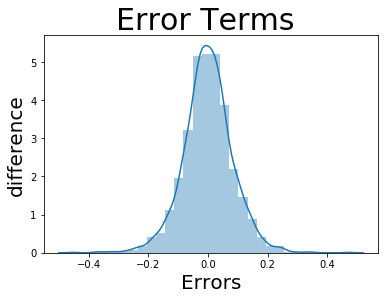

In [64]:
fig = plt.figure()
sns.distplot((train_Y - train_Y_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 30)
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('difference', fontsize = 20)


In [65]:
test_X = test_X[RFE_train_X.columns]
plt.scatter(test_Y,test_Y_pred)
plt.title('test_y Vs test_y_pred', fontsize=20)
plt.xlabel('test_Y', fontsize=20)
plt.ylabel('test_Y_pred', fontsize=20)

KeyError: "['const'] not in index"